In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

In [5]:
# read the data
data=pd.read_csv('housing.csv')
data.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [6]:
# data missing the columns' name, definitions as belowed
#ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
#INDUS: proportion of non-retail business acres per town
#CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#NOX: nitric oxides concentration (parts per 10 million)
#RM: average number of rooms per dwelling
#AGE: proportion of owner-occupied units built prior to 1940
#DIS: weighted distances to ﬁve Boston employment centers
#RAD: index of accessibility to radial highways
#TAX: full-value property-tax rate per $10,000
#PTRATIO: pupil-teacher ratio by town 
#B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 
#LSTAT: % lower status of the population
#MEDV: Median value of owner-occupied homes in $1000s

cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv('housing.csv',header=None,delimiter=r"\s+",names=cols)
data


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [7]:
#roughly idea of the dataframe
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [9]:
data.shape

(506, 14)

In [10]:
# Data Cleaning ,check null values
data.isnull().values.any()

False

<AxesSubplot:ylabel='MEDV'>

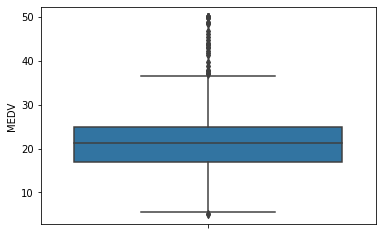

In [263]:
sns.boxplot(data=data, y= 'MEDV')

In [264]:
# for c, d in data.items(): C means "key/column_name",  d means "values" for each columns 

# df.items has two elements: "key", "values"(only data frame and dictionary has items - key,vaules)



In [16]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


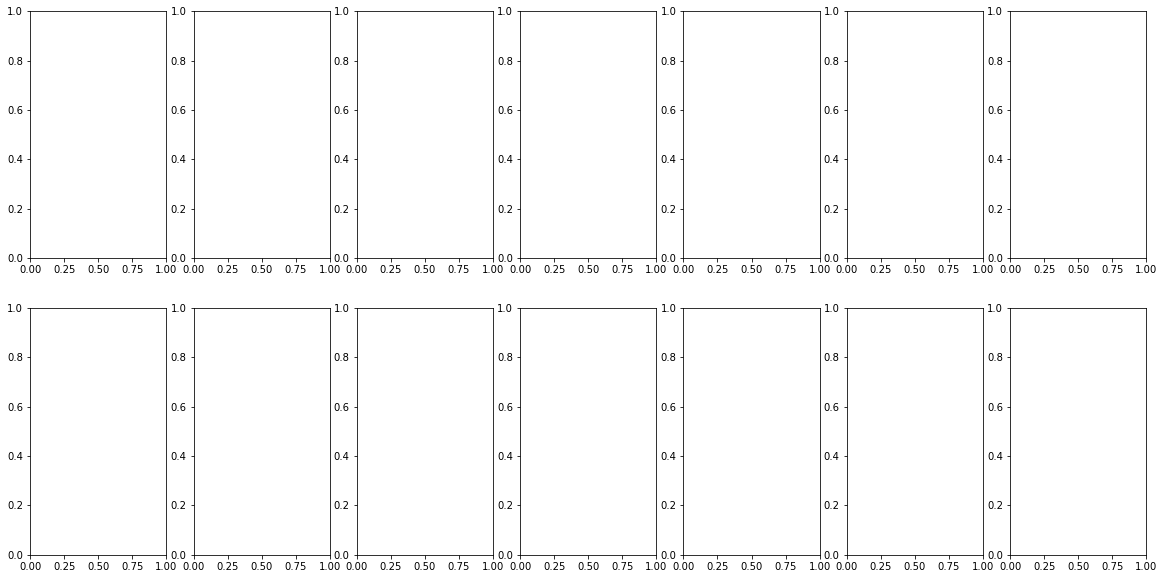

In [65]:
a = plt.subplots(ncols=7, nrows=2, figsize=[20, 10])

0 CRIM
1 ZN
2 INDUS
3 CHAS
4 NOX
5 RM
6 AGE
7 DIS
8 RAD
9 TAX
10 PTRATIO
11 B
12 LSTAT
13 MEDV


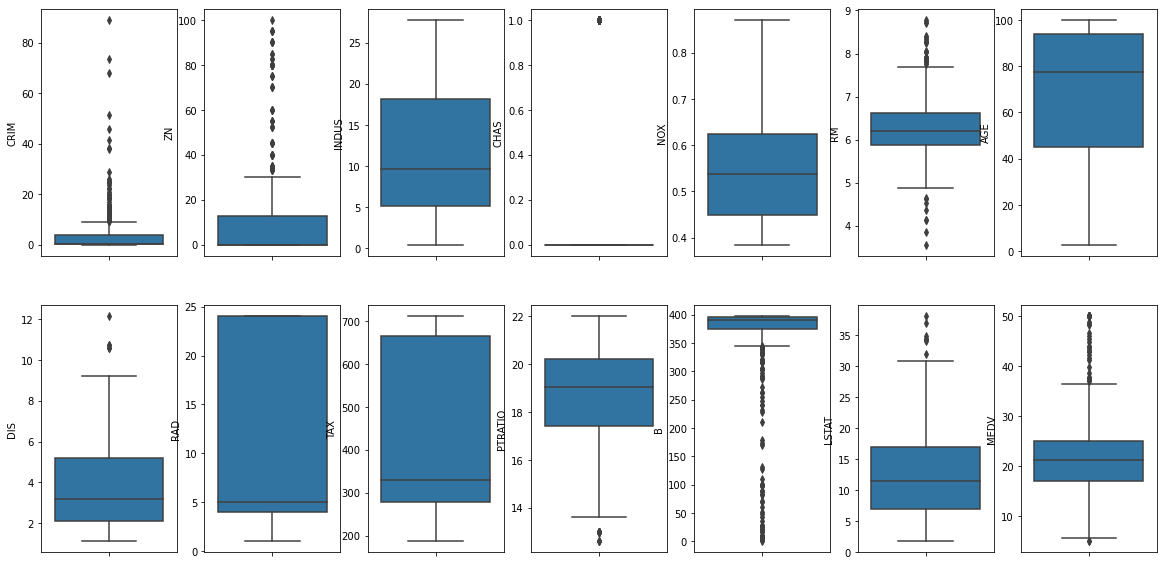

In [62]:
# features are too much, 13 features. model tunning
# for loop function, index start at 0 (default setting)

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=[20, 10])
axs = axs.flatten()
index = 0
for a, b in data.items():
    print(index,a)
    sns.boxplot(data=data,ax=axs[index],y=a)
    index = index + 1


In [24]:
axs = axs.flatten()
axs

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

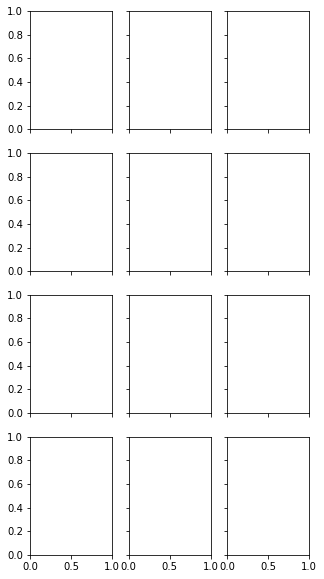

In [81]:
fig, axs = plt.subplots(4,3, figsize=[5, 10],sharex='all', sharey='all')

# for example: share X axis and Y axis 

<AxesSubplot:xlabel='MEDV'>

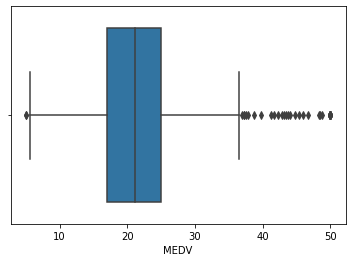

In [193]:
sns.boxplot(x=data['MEDV'])

<AxesSubplot:ylabel='MEDV'>

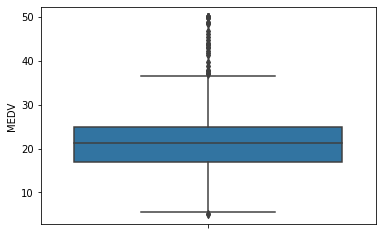

In [202]:
sns.boxplot(y=data['MEDV'])

In [203]:
data.keys()

# {key, value} default setting 
# "key" is column name, "value" is row values

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [204]:
data.values

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

In [235]:
# The Most of the columns have large number of outliers except RAD,TAX, NOX & AGE. 
# CRIM and B possess large amount of outliers than other features.
# From the data visualizing, CRIM, ZN,CHAS,RM,B,MEDV may consider to be removed from features

In [97]:
# Reducing Features-- using Random Forest Regressor
rf=RandomForestRegressor()
rf.fit(data.drop(['MEDV'],axis=1),data['MEDV'])
rf

# rf.fit: using X and Y to get a model

RandomForestRegressor()

In [98]:
#Predict X test result
Y_pred = rf.predict(data.drop(['MEDV'],axis=1))

In [99]:
#this is optional step, we don't have to calaute MSE here,because we will use 'r2_score' to compare Y_test and Pred_Y-test later

from sklearn import metrics  
print('Mean Squared Error:', metrics.mean_squared_error(data['MEDV'], Y_pred))  

Mean Squared Error: 1.5988035869565227


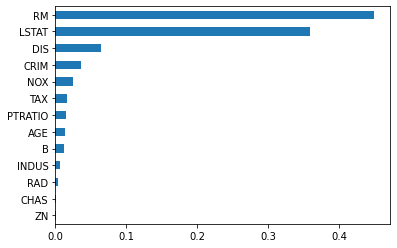

In [100]:
feat_importances= pd.Series(rf.feature_importances_,index=data.drop(['MEDV'],axis=1).columns)
feat_importances.sort_values().plot(kind='barh')
plt.show()

# rf.feature_importances_ is an attribute function
# axis=1 means columns
# axis=0 means rows

In [101]:
data.drop(['MEDV'],axis=1)

# shows all values here

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [102]:
data.drop(['MEDV'],axis=1).columns
# However, we only want to get coulmns here, so using 'columns' function  shows the column name here

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [103]:
feat_importances

CRIM       0.035453
ZN         0.000981
INDUS      0.006390
CHAS       0.001246
NOX        0.024434
RM         0.449093
AGE        0.013158
DIS        0.063687
RAD        0.004095
TAX        0.016251
PTRATIO    0.015183
B          0.011833
LSTAT      0.358195
dtype: float64

In [104]:
#Removed the features: B,INDUS,RAD,CHAS,ZN and test the performance
updated_data=data.drop(['B','INDUS','RAD','CHAS','ZN','MEDV'],axis=1)
rf.fit(updated_data,data['MEDV'])
updated_data.info()

# rf.fit: using new updated data as X and Y to get a newest model

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   NOX      506 non-null    float64
 2   RM       506 non-null    float64
 3   AGE      506 non-null    float64
 4   DIS      506 non-null    float64
 5   TAX      506 non-null    float64
 6   PTRATIO  506 non-null    float64
 7   LSTAT    506 non-null    float64
dtypes: float64(8)
memory usage: 31.8 KB


In [105]:
#Predict X test result and test the peroformance
Y_pred = rf.predict(updated_data)
print('Mean Squared Error:', metrics.mean_squared_error(data['MEDV'], Y_pred))  

# rf.predict: using newest model to predict Y and get mean_squared_error
# we found that drop features B,INDUS,RAD,CHAS,ZN as X to predict Y to get smaller error which is better 

Mean Squared Error: 1.4951922114624487


In [106]:
#split training and testing data, STD 0.2 and 0.8
# updated data is Removed the features: B,INDUS,RAD,CHAS,ZN 
# Predict Y is 'MEDV' target varaible

X=updated_data
Y=data['MEDV']
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,train_size = 0.8)
print('Train Dataset : {} Test Dataset:{}'.format(X_train.shape, X_test.shape))

Train Dataset : (404, 8) Test Dataset:(102, 8)


In [126]:
X
# 将X当作为data frame，有 key，vaule

,CRIM,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT
0,0.00632,0.538,6.575,65.2,4.0900,296.0,15.3,4.98
1,0.02731,0.469,6.421,78.9,4.9671,242.0,17.8,9.14
2,0.02729,0.469,7.185,61.1,4.9671,242.0,17.8,4.03
3,0.03237,0.458,6.998,45.8,6.0622,222.0,18.7,2.94
4,0.06905,0.458,7.147,54.2,6.0622,222.0,18.7,5.33
...,...,...,...,...,...,...,...,...
501,0.06263,0.573,6.593,69.1,2.4786,273.0,21.0,9.67
502,0.04527,0.573,6.120,76.7,2.2875,273.0,21.0,9.08
503,0.06076,0.573,6.976,91.0,2.1675,273.0,21.0,5.64
504,0.10959,0.573,6.794,89.3,2.3889,273.0,21.0,6.48


In [124]:
Y
# Y 是 MEDV- target variable, 只是 value

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [130]:
# we have removed the features: B,INDUS,RAD,CHAS,ZN and MEDV is target variable, so here is (14-6 = 8 columns).
# shape function: to get row number and column number. so (404,8) is (row number, column number)

(X_train.shape, X_test.shape)

((404, 8), (102, 8))

In [129]:
(Y_train.shape, Y_test.shape)

((404,), (102,))

In [121]:
# 将X当作为data frame，然后X_train有80%的data frame，X_test有20%的data frame

(X_train, X_test)

(         CRIM    NOX     RM    AGE     DIS    TAX  PTRATIO  LSTAT
 450   6.71772  0.713  6.749   92.6  2.3236  666.0     20.2  17.44
 249   0.19073  0.431  6.718   17.5  7.8265  330.0     19.1   6.56
 73    0.19539  0.413  6.245    6.2  5.2873  305.0     19.2   7.54
 454   9.51363  0.713  6.728   94.1  2.4961  666.0     20.2  18.71
 344   0.03049  0.484  6.874   28.1  6.4654  370.0     17.6   4.61
 ..        ...    ...    ...    ...     ...    ...      ...    ...
 305   0.05479  0.472  6.616   58.1  3.3700  222.0     18.4   8.93
 186   0.05602  0.488  7.831   53.6  3.1992  193.0     17.8   4.45
 247   0.19657  0.431  6.226   79.2  8.0555  330.0     19.1  10.15
 426  12.24720  0.584  5.837   59.7  1.9976  666.0     20.2  15.69
 400  25.04610  0.693  5.987  100.0  1.5888  666.0     20.2  26.77
 
 [404 rows x 8 columns],
          CRIM    NOX     RM    AGE     DIS    TAX  PTRATIO  LSTAT
 463   5.82115  0.713  6.513   89.9  2.8016  666.0     20.2  10.29
 213   0.14052  0.489  6.375   32.3

In [142]:
# Modelling-- Linear Regression
# assign linearregression model to 'lr'(自定义名字）
lr=LinearRegression()
lr.fit(X_train,Y_train) # lr.fit using X_train,Y_train to get a model
pred_Y_test=lr.predict(X_test)  # put X_test into lr model, to get a predict_Y_test
r2_score(Y_test,pred_Y_test)   # compare actual_Y_test and pred_Y_test to get r2_score (evalaute error)

0.7469747605615096

In [146]:
# another method is using 'score'= predict + r2_score 合在一起了
lr_test_acc=lr.score(X_test,Y_test)
print('The testing accurancy for LR is ',lr_test_acc)

The testing accurancy for LR is  0.7469747605615096


In [147]:
pred_Y_train=lr.predict(X_train)
r2_score(Y_train,pred_Y_train)

0.7018632632832165

In [148]:
# another method is using 'score'= predict + r2_score
lr_train_acc= lr.score(X_train,Y_train)
print('The training accurancy for LR is ',lr_train_acc)

The training accurancy for LR is  0.7018632632832165


In [160]:
# Modelling -- Decision Tree
# we use trianing set to fit model, we use testing set to predict 

dt=DecisionTreeRegressor(max_depth=4, random_state=1)
dt.fit(X_train, Y_train)
pred_Y_test = dt.predict(X_test)
print(r2_score(Y_test,pred_Y_test))

0.7610849925231502


In [164]:
#another method is using 'score'= predict + r2_score
dt_acc= dt.score(X_test,Y_test)
print('The training accurancy for decision tree is',dt_acc)

The training accurancy for decision tree is 0.7610849925231502


In [178]:
# Modelling -- Random Forest Regression

rff=RandomForestRegressor(random_state =1)
rff.fit(X_train,Y_train)
rff_pred_Y_test=rff.predict(X_test)
print('r2_score is:', r2_score(Y_test,rff_pred_Y_test))

# r2_score function: r2_score(Y_test,pred_Y_test) 
# 这个 X_test是个data frame， 用这个X_test 去 predict Y_test

r2_score is: 0.8619229046227777


In [179]:
#The Random Forest Regression seems has highest accurancy for both Training and Testing dataset

print('The training accurancy for RF is ',rff.score(X_train,Y_train))
print('The testing accurancy for RF is ',rff.score(X_test,Y_test))

The training accurancy for RF is  0.9809508724296546
The testing accurancy for RF is  0.8619229046227777


In [ ]:
# X_train is 80% data frame（有key，value的形式）-〉to predict Y_train（Y_train 只是一列value）

# X_test is 20% data frame to predict Y_test 

In [ ]:
# r2_score is a value between 0 and 1, where: r2_score is closed to 1 means that perfect to fit the line and more accurancy 


In [ ]:
# we use trianing set to fit model, we use testing set to predict 